In [63]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [64]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [66]:
import pandas as pd

df = pd.read_csv("/content/UNBER-1k.csv")
df

,reel_id,UnsafeType,Visual texts
0,www.facebook.com/reel/1000188341415358,Safe,Me on my way to watch Oppenheimer After Berbie
1,www.facebook.com/reel/1006146964533997,Safe,NaN
2,www.facebook.com/reel/1007123741459823,Adult,বান্ধবী আমার লাগানির পিনিকে আছে Love in love
3,www.facebook.com/reel/1007420607202244,Safe,প্রত্যেকটা অফিসে এমন একজন কলিগ থাকবেই Laptop
4,www.facebook.com/reel/1008519870870927,Safe,হ্যালো শার্ক ট্যাঙ্ক বাংলাদেশ আই এম কামিং
...,...,...,...
1112,www.facebook.com/reel/946250977507282,Suicidal,কিছু কথা বাকি ছিল আর হয়তো কোনদিনও বলা হবে না
1113,www.facebook.com/reel/951238780033589,Suicidal,তোমাকে মন দিয়ে ভালোবাসতাম উপহার হিসাবে তোমার ক...
1114,www.facebook.com/reel/974520454682213,Suicidal,ওগো শুনছো একথা বলা মানুষটা আজ অন্য কারোর।
1115,www.facebook.com/reel/975204184253727,Suicidal,"মন দিয়ে ভালোবাসতে গেলাম, অবশেষে ধোকা পেলাম।"


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reel_id       1117 non-null   object
 1   UnsafeType    1117 non-null   object
 2   Visual texts  739 non-null    object
dtypes: object(3)
memory usage: 26.3+ KB


In [68]:
df['Visual texts'] = df['Visual texts'].fillna("কোন টেক্সট পাওয়া যায়নি")
df

,reel_id,UnsafeType,Visual texts
0,www.facebook.com/reel/1000188341415358,Safe,Me on my way to watch Oppenheimer After Berbie
1,www.facebook.com/reel/1006146964533997,Safe,কোন টেক্সট পাওয়া যায়নি
2,www.facebook.com/reel/1007123741459823,Adult,বান্ধবী আমার লাগানির পিনিকে আছে Love in love
3,www.facebook.com/reel/1007420607202244,Safe,প্রত্যেকটা অফিসে এমন একজন কলিগ থাকবেই Laptop
4,www.facebook.com/reel/1008519870870927,Safe,হ্যালো শার্ক ট্যাঙ্ক বাংলাদেশ আই এম কামিং
...,...,...,...
1112,www.facebook.com/reel/946250977507282,Suicidal,কিছু কথা বাকি ছিল আর হয়তো কোনদিনও বলা হবে না
1113,www.facebook.com/reel/951238780033589,Suicidal,তোমাকে মন দিয়ে ভালোবাসতাম উপহার হিসাবে তোমার ক...
1114,www.facebook.com/reel/974520454682213,Suicidal,ওগো শুনছো একথা বলা মানুষটা আজ অন্য কারোর।
1115,www.facebook.com/reel/975204184253727,Suicidal,"মন দিয়ে ভালোবাসতে গেলাম, অবশেষে ধোকা পেলাম।"


In [69]:
import requests

url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-bn/master/stopwords-bn.txt"
response = requests.get(url)
bengali_stopwords = response.text.splitlines()

print("Total Bengali Stopwords:", len(bengali_stopwords))

Total Bengali Stopwords: 398


In [70]:
banglish_stopwords = [
    "ami", "tumi", "she", "amra", "tomra", "tara", "kono", "onek", "kichu",
    "kintu", "shudhu", "jeta", "ki", "keno", "kothay", "jokhon", "tokhon",
    "abar", "ekhane", "othoba", "ba", "keu", "jodi", "achhe", "niye", "jeta", "hoye", "jay", "ache", "ar", "korle", "ja",
    "na", "ei", "eta", "shei", "nah"
]

In [71]:
combined_stopwords = set(bengali_stopwords + banglish_stopwords)

print("Total Combined Stopwords:", len(combined_stopwords))

Total Combined Stopwords: 434


In [72]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\u0980-\u09FF ]', '', text)
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    bengali_stopwords = combined_stopwords
    stop_words.update(bengali_stopwords)
    words = [word for word in words if word.lower() not in stop_words and len(word) > 1]

    return words

In [73]:
df['cleaned_text'] = df['Visual texts'].apply(clean_text)
df

,reel_id,UnsafeType,Visual texts,cleaned_text
0,www.facebook.com/reel/1000188341415358,Safe,Me on my way to watch Oppenheimer After Berbie,"[way, watch, Oppenheimer, Berbie]"
1,www.facebook.com/reel/1006146964533997,Safe,কোন টেক্সট পাওয়া যায়নি,"[টেক্সট, পাওয়া, যায়নি]"
2,www.facebook.com/reel/1007123741459823,Adult,বান্ধবী আমার লাগানির পিনিকে আছে Love in love,"[বান্ধবী, লাগানির, পিনিকে, Love, love]"
3,www.facebook.com/reel/1007420607202244,Safe,প্রত্যেকটা অফিসে এমন একজন কলিগ থাকবেই Laptop,"[প্রত্যেকটা, অফিসে, একজন, কলিগ, থাকবেই, Laptop]"
4,www.facebook.com/reel/1008519870870927,Safe,হ্যালো শার্ক ট্যাঙ্ক বাংলাদেশ আই এম কামিং,"[হ্যালো, শার্ক, ট্যাঙ্ক, বাংলাদেশ, এম, কামিং]"
...,...,...,...,...
1112,www.facebook.com/reel/946250977507282,Suicidal,কিছু কথা বাকি ছিল আর হয়তো কোনদিনও বলা হবে না,"[কথা, বাকি, হয়তো, কোনদিনও]"
1113,www.facebook.com/reel/951238780033589,Suicidal,তোমাকে মন দিয়ে ভালোবাসতাম উপহার হিসাবে তোমার ক...,"[তোমাকে, মন, দিয়ে, ভালোবাসতাম, উপহার, অবহেলা, ..."
1114,www.facebook.com/reel/974520454682213,Suicidal,ওগো শুনছো একথা বলা মানুষটা আজ অন্য কারোর।,"[ওগো, শুনছো, একথা, মানুষটা, কারোর]"
1115,www.facebook.com/reel/975204184253727,Suicidal,"মন দিয়ে ভালোবাসতে গেলাম, অবশেষে ধোকা পেলাম।","[মন, দিয়ে, ভালোবাসতে, গেলাম, অবশেষে, ধোকা, পেলাম]"


In [74]:
word_frequencies = {}

# Iterate through the cleaned text and update frequencies
for index, row in df.iterrows():
    for word in row['cleaned_text']:
      word = word.lower()
      if word in word_frequencies:
          word_frequencies[word] += 1
      else:
          word_frequencies[word] = 1

In [75]:
sorted_frequencies = dict(sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True))

In [76]:
cnt = 0

for word, frequency in sorted_frequencies.items():
    print(f'{word}: {frequency}')
    cnt += 1
    if cnt == 5:
        break

পাওয়া: 382
যায়নি: 380
টেক্সট: 378
কথা: 68
ভাই: 53


In [77]:
df['UnsafeType'].value_counts()

,count
UnsafeType,
Safe,442
Adult,329
Harmful,221
Suicidal,125


In [78]:
import random

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [79]:
df

,reel_id,UnsafeType,Visual texts,cleaned_text
0,www.facebook.com/reel/940909878048735,Safe,"যাদের কথা আঘাত আমার রূহ পর্যন্ত পৌঁছে গেছে, তা...","[কথা, আঘাত, রূহ, পৌঁছে, সুখ, দেখার, বেঁচে, থাকতে]"
1,www.facebook.com/reel/1163896471253100,Safe,তোমার ভাই আমার ভাই মোরসালিন ভাই মোরসালিন ভাই,"[ভাই, ভাই, মোরসালিন, ভাই, মোরসালিন, ভাই]"
2,www.facebook.com/reel/576193358306179,Adult,বন্ধকে সান্তনা দিতে এসে nura,"[বন্ধকে, সান্তনা, nura]"
3,www.facebook.com/reel/883356346297033,Harmful,ইফতার করার পর বন্ধু শয়তান,"[ইফতার, বন্ধু, শয়তান]"
4,www.facebook.com/reel/460478153542966,Suicidal,কল্পনারে স্বপ্ন সুন্দ্র বাস্তব এ না... পুরুষ ট...,"[কল্পনারে, স্বপ্ন, সুন্দ্র, বাস্তব, পুরুষ, টাক..."
...,...,...,...,...
1112,www.facebook.com/reel/551109851125442,Safe,The Talking Bro,"[Talking, Bro]"
1113,www.facebook.com/reel/1212912926591045,Safe,কোন টেক্সট পাওয়া যায়নি,"[টেক্সট, পাওয়া, যায়নি]"
1114,www.facebook.com/reel/1923545318061688,Suicidal,ব্যর্থ প্রেম - Feeling sad. অনেক ধন্যবাদ তোমাক...,"[ব্যর্থ, প্রেম, Feeling, sad, ধন্যবাদ, তোমাকে,..."
1115,www.facebook.com/reel/7617312368360921,Suicidal,তোমার জন্য আমি কেন্দে বেড়াতাম শেষ পর্যন্ত কান্...,"[কেন্দে, বেড়াতাম, শেষ, কান্দিয়ে, ছেড়ে, দিলে]"


## word2vec

In [80]:
tokenized_data = df['cleaned_text'].tolist()

In [81]:
import gensim
from gensim.models import Word2Vec

In [82]:
word2vec_model = Word2Vec(
    sentences=tokenized_data,
    vector_size=100,  # Embedding dimension
    window=7,         # Window size
    sg=1,             # Use skip-gram (1 for skip-gram, 0 for CBOW)
    min_count=1,      # Minimum word frequency
    workers=4         # Number of worker threads
)

In [83]:
word2vec_model.save("word2vec_model.model")

In [84]:
word2vec_model.wv['বয়স্ক']

array([-0.07863203,  0.05041219,  0.1643435 ,  0.00872783, -0.00524611,
       -0.06780655, -0.03349639,  0.16945517, -0.07079309, -0.04181496,
       -0.15078773, -0.1175134 ,  0.01269657, -0.01421578,  0.03617153,
       -0.05755887, -0.03858725, -0.15058379,  0.04020249, -0.21840139,
        0.08492851,  0.09472495, -0.0085822 ,  0.00224143, -0.02540499,
        0.04346573, -0.12949182, -0.03761203, -0.07326919, -0.04603152,
        0.0341289 ,  0.09029941, -0.08126603, -0.04812615, -0.02541811,
        0.13167953,  0.03422152, -0.06264258, -0.06818923, -0.24817708,
        0.00838726, -0.21443225, -0.06668855, -0.01382929,  0.16355014,
       -0.1608393 , -0.18373945, -0.095286  ,  0.06233462, -0.01818806,
        0.07823345, -0.12111577, -0.02436056, -0.02632176, -0.05733436,
        0.07941087,  0.04990463, -0.01850023, -0.0426157 , -0.02523415,
       -0.01270331,  0.02050686,  0.01912433,  0.04046781, -0.12032066,
        0.06719692,  0.03206658, -0.00152455, -0.15082401,  0.10

In [85]:
word2vec_model.wv['Chele']

array([-0.01664595,  0.0098223 ,  0.03864302, -0.00861962,  0.00393841,
       -0.01555193, -0.01199906,  0.03949891, -0.0180612 , -0.00350524,
       -0.04197065, -0.0184397 ,  0.00196148,  0.00474961, -0.00259847,
       -0.0034904 , -0.0162113 , -0.03914088,  0.00560483, -0.05249285,
        0.01054643,  0.02919573, -0.00553792, -0.0017985 ,  0.00300405,
        0.01997901, -0.02583587, -0.00595507, -0.01402079, -0.00994177,
        0.00768721,  0.01490648, -0.02301116, -0.00729704, -0.01280801,
        0.03168201,  0.00400085, -0.01437426, -0.01537136, -0.05126454,
        0.01041615, -0.04438841, -0.0034946 , -0.01125799,  0.03545645,
       -0.03786301, -0.03582945, -0.0106101 ,  0.00612176,  0.00271591,
        0.00387756, -0.02530583,  0.00013734, -0.00026889, -0.01771796,
        0.01033898,  0.01806989, -0.0037452 , -0.00096521, -0.00105643,
       -0.00163835,  0.00179334,  0.00368197,  0.00839742, -0.02495124,
        0.01105567,  0.00107182, -0.00200191, -0.02573331,  0.01

In [86]:
len(word2vec_model.wv.index_to_key)

4940

In [87]:
def get_sentence_embedding(sentence, model):
    tokens = [token for token in tokenized_data]
    embeddings = [model.wv[token] for token in tokens if token in model.wv]
    if embeddings:
        return sum(embeddings) / len(embeddings)  # Average embedding for the sentence
    else:
        return None

In [88]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = word2vec_model.vector_size

In [90]:
def text_to_sequence(text, word2vec_model):
    sequence = []
    for word in text.split():
        if word in word2vec_model.wv:
            sequence.append(word2vec_model.wv[word])
        else:
            sequence.append(np.zeros(EMBEDDING_DIM))
    return sequence

In [91]:
X = [text_to_sequence(text, word2vec_model) for text in df['Visual texts']]
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH, dtype='float32', padding='post', truncating='post')

In [92]:
df['UnsafeType'], uniques = pd.factorize(df['UnsafeType'])
uniques

Index(['Safe', 'Adult', 'Harmful', 'Suicidal'], dtype='object')

In [93]:
y = df['UnsafeType']

In [94]:
y = np.array(y)

In [95]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [96]:
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

In [97]:
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True), input_shape=(MAX_SEQUENCE_LENGTH, EMBEDDING_DIM)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # Use sigmoid for binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [98]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [99]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [100]:
model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.3828 - loss: 1.3457 - val_accuracy: 0.4168 - val_loss: 1.2687
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4268 - loss: 1.2357 - val_accuracy: 0.4204 - val_loss: 1.2352
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4201 - loss: 1.1980 - val_accuracy: 0.4168 - val_loss: 1.2340
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4332 - loss: 1.2177 - val_accuracy: 0.3953 - val_loss: 1.2573
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3859 - loss: 1.2343 - val_accuracy: 0.4097 - val_loss: 1.2132
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4162 - loss: 1.2106 - val_accuracy: 0.4186 - val_loss: 1.2578
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4026 - loss: 1.2153 - val_accuracy: 0.4150 - val_loss: 1.2219
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3940 - loss: 1.2098 - val_accuracy: 0.4097 - v

In [101]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true_classes = y_test.flatten()

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [102]:
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.46      0.58      0.51       221
           1       0.42      0.54      0.47       164
           2       0.34      0.10      0.15       110
           3       0.83      0.46      0.59        63

    accuracy                           0.46       558
   macro avg       0.51      0.42      0.43       558
weighted avg       0.47      0.46      0.44       558



In [103]:
classes = ['Safe', 'Adult', 'Harmful', 'Suicidal']

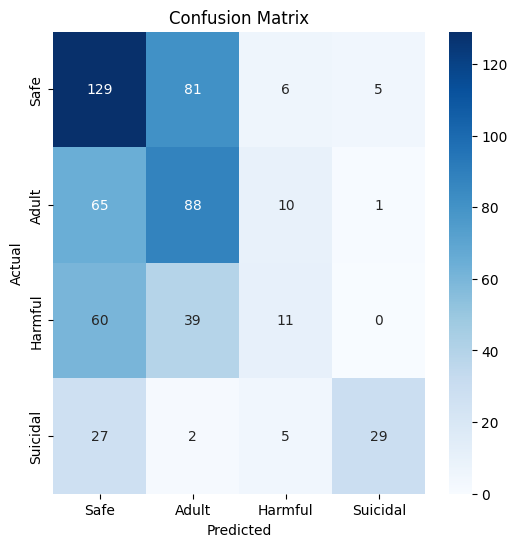

In [104]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()